I decided to take a look into meteostat (https://github.com/meteostat/meteostat-python) as it is the library we will use as data source for our project. First I need to install it.





In [1]:
pip install meteostat

Then some basic functions from other libraries (pyplot for a simple plot, dateime for a proper date format) as well as the meteostat functions are importet

In [4]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Daily, Point, Normals, Monthly, Stations
import numpy


As a first simple start, I adapted the example from the meteostat documentation.
So I request the daily weather data for Salzburg in 2023, using the data from the nearest available weather station. Then I plot the daily average, minimal and maximum temperature.

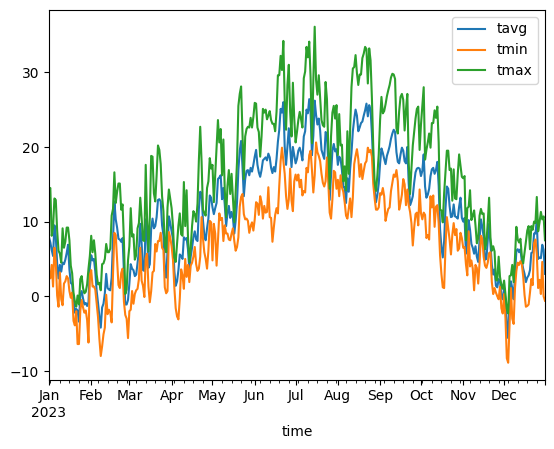

In [5]:
start = datetime(2023, 1, 1)
end = datetime(2023, 12, 31)

# Create Point for Salzburg
location = Point(47.7972, 13.0477)

# Get daily data for 2023
data = Daily(location, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [7]:
stations = Stations()
stations = stations.nearby(47.7972, 13.0477)
stationSbg2 = stations.fetch(200)
test=stationSbg2.dropna()
indexes=test.index
Daily("11150")
for i in indexes:
  data=Daily(str(i),start,end)
  data=data.fetch()
  print(i)
  print(data)


11150
            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2023-01-01   9.4   6.4  14.9   0.0   NaN  139.0  14.4  35.3  1024.3   NaN
2023-01-02   9.1   5.7  14.2   0.0   NaN  153.0  17.7  38.9  1023.2   NaN
2023-01-03   6.4   4.4   7.9   4.6   NaN    0.0   5.4  16.6  1031.1   NaN
2023-01-04   6.0   1.6   9.5   0.0   NaN  142.0  12.6  27.7  1028.8   NaN
2023-01-05   9.4   5.6  13.3   2.0   NaN  329.0  15.0  76.0  1023.0   NaN
...          ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
2023-12-27   5.5   2.4   9.3   0.0   NaN  145.0  14.4  37.1  1023.8   NaN
2023-12-28   6.1   2.6  10.3   0.0   NaN  140.0  15.9  42.5  1022.0   NaN
2023-12-29   6.8   4.7  11.3   0.0   NaN  150.0  15.3  37.1  1019.6   NaN
2023-12-30   5.3   1.5  10.9   0.0   NaN  128.0  12.0  31.5  1019.7   NaN
2023-12-31   4.2   1.3   8.3   7.0   NaN  107.0  15.5  40.7  1012.0   NaN

[365 rows x 10 columns]
11143
 

Now, I want to further explore what is possible and also what kind of basic analysis is already provided in the library. This way I gain information on what functionalities I have to implement myself later for the project and which functionalities are already ready to use.
I especially looked at the Normals-function as it gives an overview over the weather in a 30 year period and thus about climate. This is helpful with comparisons regarding climate change. I want to compare how the climate changed in Salzburg from the 1961-1990 period to the 1991-2020 period.

                      name country region    wmo  icao  latitude  longitude  \
id                                                                            
11350  Salzburg / Freisaal      AT     SZ  11350  <NA>   47.7833      13.05   
11150             Salzburg      AT     SZ  11150  LOWS   47.8000      13.00   

       elevation       timezone hourly_start hourly_end daily_start  \
id                                                                    
11350      420.0  Europe/Vienna          NaT        NaT         NaT   
11150      430.0  Europe/Vienna   1938-06-01 2024-05-22  1874-01-01   

       daily_end monthly_start monthly_end     distance  
id                                                       
11350        NaT           NaT         NaT  1555.130874  
11150 2024-05-14    1874-01-01  2022-01-01  3576.478293  


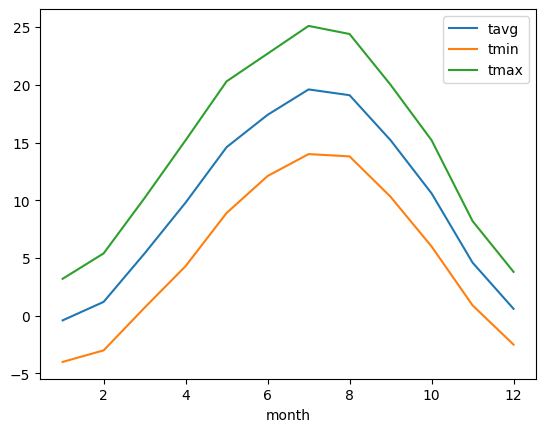

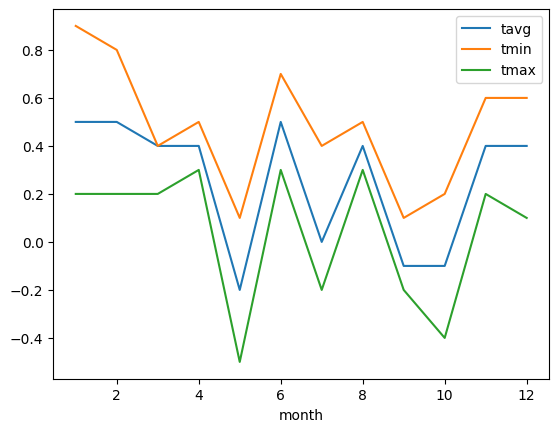

<Axes: xlabel='month'>

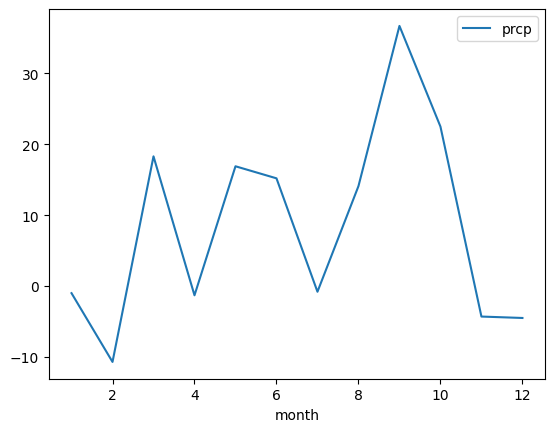

In [ ]:
#First, I find which two stations are the closest to Salzburg and print their data.
stations = Stations()
stations = stations.nearby(47.7972, 13.0477)
stationSbg = stations.fetch(2)
print(stationSbg)
#Then I use the station with better data as a source for the Normals function. Period is 1961-1990
data = Normals('11150',1961,1990)
data = data.fetch()
# Plot line chart including average, minimum and maximum temperature. Just for practice
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

#Calculate the same data (normal weather) for 1991-2020, this time no graph
data2 = Normals('11150',1991,2020)
data2 = data2.fetch()

#create a new dataset, showing us the differences from the two periods and thus how climate changed from one period to the other
data3=data2-data
# Plot a chart visualizing the change in average, minimal and maximal temperature from timespan1 to timespan2
data3.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()
# Plot a chart visualizing the change in precipation from timespan1 to timespan2
data3.plot(y=['prcp'])

In [ ]:
print(data2)
test=data2["tavg"]
print(test)
min(test)


       tavg  tmin  tmax   prcp  wspd    pres     tsun
month                                                
1       0.1  -3.1   3.4   62.0   NaN  1021.6   5116.2
2       1.7  -2.2   5.6   47.3   NaN  1020.0   6161.5
3       5.8   1.1  10.4   83.3   NaN  1018.1   8520.0
4      10.2   4.8  15.5   79.7   NaN  1014.3  10689.2
5      14.4   9.0  19.8  141.9   NaN  1015.3  11940.0
6      17.9  12.8  23.0  168.2   NaN  1015.8  11944.6
7      19.6  14.4  24.9  159.2   NaN  1015.8  12946.2
8      19.5  14.3  24.7  167.1   NaN  1016.2  12604.6
9      15.1  10.4  19.8  126.7   NaN  1017.5   9920.8
10     10.5   6.2  14.8   89.5   NaN  1018.1   8102.3
11      5.0   1.5   8.4   69.7   NaN  1018.1   4943.1
12      1.0  -1.9   3.9   66.5   NaN  1020.4   4209.2
month
1      0.1
2      1.7
3      5.8
4     10.2
5     14.4
6     17.9
7     19.6
8     19.5
9     15.1
10    10.5
11     5.0
12     1.0
Name: tavg, dtype: float64


0.1

What we can see from the graphs is that the normal weather indeed changed. Especially the minimum temperature in winter months increased a lot, in January by almost one degree. The daily precipation also increased in almost all months. However, the precipation in winter decreased. So overall we have dryer, warmer winters, leading to less snow.

As a check on the functionality regarding monthly data, we see how the weather in Salzburg was during the past decade, especially with a focus on precipation:


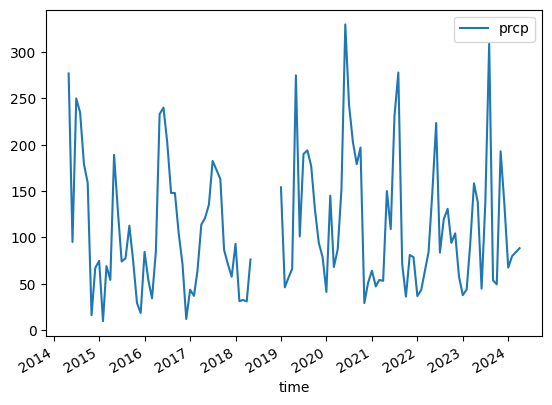

In [ ]:
start = datetime(2014, 5, 1)
end = datetime(2024, 4, 30)

# Get Monthly data
data = Monthly('11150', start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['prcp'])
plt.show()